<a href="https://colab.research.google.com/github/Magdabat/Projects/blob/main/Startrek_classification_model_vFF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction


**The Idea:**
As a huge Star Trek fan, I'm working on a model that can predict which series a picture comes from. You take a snap of the screen, upload it and the model tells you which Star Trek series you are looking at.
In the current version, I focus on four series:
- The Next Generation
- Discovery
- Deep Space Nine
- Voyager

**The Technology:**
Keras and convolutional neural networks

**The Training Data:**
I'm scraping pictures from IMDB, which has an image collection for various TV shows and movies. This also makes the idea scalable with different movies / TV-shows (all you need is the movies id)

**Problematisation:**
- The pictures from IMDB are not ideal, as they include portraits of actors, backstage shots, and posters. 
- Additionally, IMDB primarily focuses on main actors and objects (starships, props). So, if somebody takes shot of something that is not in the training data, it will not be recognised properly.
- Another challenge is that some of the series are quite similar. In particularly The Next Generation and Deep Space Nine, which share many actors.

*Now, let us see what Keras and CNN are capable of:).*

# Libraries Import

In [1]:
# Imoporting Libraries
import requests
import urllib.request
from bs4 import BeautifulSoup
from time import sleep
import random
import numpy as np
import pandas as pd
import os

#Connecting to the drive
from  google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Downloading Pictures

##Defining functions

In [3]:
#To create annotations
from typing import List

#empty list to keep the urls
image_urls = []

def download_link_list(max_pages: int, imdb_id: str) -> List[str]:
  '''
  Downloads and extracts image links for a movie with the given IMDB ID, up to the given number of pages.
  
  Args:
      max_pages (int): The maximum number of pages to scrape for image links.
      imdb_id (str): The IMDB ID of the movie to scrape for image links.
  
  Returns:
      A list of extracted image links as strings.
  '''
  for page_num in range(1, max_pages):
      try:
          url = f'https://www.imdb.com/title/{imdb_id}/mediaindex?page={page_num}&ref_=ttmi_mi_sm'

          #prints a note when multiples of 10 pages were processed
          if page_num % 10 == 0:
              print(f'Downloaded links from {page_num} pages')

          #scrapping the html
          response = requests.get(url)
          content = response.content
          sleep(random.randint(1, 3))  # pause to avoid overloading the server
          soup = BeautifulSoup(content, 'html.parser')

          #Accessing a list of the links. 
          #There is also another path available in the html, but imdb blocks the downloading of the pics through it. 
          #No matter what pages are indicated to be used, pictures from the first website are downloaded 
          imagelist = soup.find('div', {'class': 'media_index_thumb_list'})
          a_links_list = imagelist.find_all('a')
          
          for a in a_links_list:
              #<img alt="Patrick Stewart and Stephen Markle in Star Trek: The Next Generation (1987)" height="100" src="https://m.media-amazon.com/images/M/MV5BMTkwMTMyODE1Ml5BMl5BanBnXkFtZTgwMjkxNTg0MjE@._V1_UY100_CR16,0,100,100_AL_.jpg" width="100"/>
              img_url = a.find_all('img')[0]['src']
              
              # Removing ._V1_UY100_CR16,0,100,100_AL_ that make the pic smaller
              img_url = img_url.split('@')
              image_urls.append(img_url[0] + '@.jpg')
      except:
          print('Something went wrong while scraping.')

  return image_urls

In [8]:
def clean_image_urls() -> None:
  '''
  Clears the list of image URLs.
  '''
  global image_urls
  image_urls.clear()

In [5]:
# Comment: for scalability, the path needs to be taken-out
path='/content/drive/MyDrive/Images_webscrapping/img_project/Startrek_classification/train/'

def save_images(image_urls: List[str], title: str, path: str) -> None:
  '''
  Downloads images from a list of URLs and saves them to disk in the "training" directory under the given title.
  
  Args:
      image_urls (List[str]): A list of image URLs to download.
      title (str): The title of the movie to use as the subdirectory name to save the images in.
      path (str): Path when files should be saved
  '''
  
  # path where pictures will be saved. More versetile would be to have it as input
  path_movie = os.path.join(path,title)
  
  # dowloading images
  for i, link in enumerate(image_urls):
      try:
          pic_name = link.split('/')[-1]
          os.makedirs(path_movie, exist_ok=True)
          urllib.request.urlretrieve(link, f'{path_movie}/{pic_name}')
          if i % 50 == 0:
              print(f'Processed {i} links')
      except:
          print('Picture not found.')

##Downloading the pictures

Note: The funcion fails to download some pictures ' Piction not found'.
Since more than enough pictures are process, I choose not to look into it.

In [ ]:
# # Star Trek: Next Generation - tt0092455
# clean_image_urls()
# download_link_list(70,'tt0092455')
# save_images(image_urls, 'start_trek_next_generation', path)

In [ ]:
# # Star Trek: Discovery - tt5171438
# clean_image_urls()
# download_link_list(30,'tt5171438')
# save_images(image_urls, 'start_trek_discovery', path)

In [ ]:
# # Star Trek: Deep Space Nine - tt0106145
# clean_image_urls()
# download_link_list(70,'tt0106145')
# save_images(image_urls, 'start_trek_deep_space_nine', path)

In [ ]:
# # Star Trek: Voyager - tt0112178
# clean_image_urls()
# download_link_list(45,'tt0112178')
# save_images(image_urls, 'start_trek_voyager', path)

# Preprocessing

In [10]:
#Checking how many pictures I do have for the movies
titles=['start_trek_next_generation', 
        'start_trek_discovery',
        'start_trek_deep_space_nine',
        'start_trek_voyager']

for title in titles:
  path=f'/content/drive/MyDrive/Images_webscrapping/img_project/Startrek_classification/train/{title}'
  print(f'{path}/:{len(os.listdir(path))}')


# /content/drive/MyDrive/Images_webscrapping/img_project/Startrek_classification/train/start_trek_next_generation/:2491
# /content/drive/MyDrive/Images_webscrapping/img_project/Startrek_classification/train/start_trek_discovery/:949
# /content/drive/MyDrive/Images_webscrapping/img_project/Startrek_classification/train/start_trek_deep_space_nine/:2442
# /content/drive/MyDrive/Images_webscrapping/img_project/Startrek_classification/train/start_trek_voyager/:1480

/content/drive/MyDrive/Images_webscrapping/img_project/Startrek_classification/train/start_trek_next_generation/:2491
/content/drive/MyDrive/Images_webscrapping/img_project/Startrek_classification/train/start_trek_discovery/:949
/content/drive/MyDrive/Images_webscrapping/img_project/Startrek_classification/train/start_trek_deep_space_nine/:2442
/content/drive/MyDrive/Images_webscrapping/img_project/Startrek_classification/train/start_trek_voyager/:1480


Note: The data is imbalanced with different numbers of pictures from different Star Trek categories. This may cause issues as the model may be biased towards the more frequent categories and not perform as well on the others. As a result, the model may overfit to the overrepresented categories and perform poorly on the underrepresented categories.

*Why are there different number of pictures from different movies?*
It has to do with the length [and popularity] of the series. While Next Generation has 7 seasons with around 25 episodes per season, Discovery is newer and has only 5 seasons with around 15 episodes per season

### Train / Test Split

In [ ]:
# #Splitting into test and train folders
# os.makedirs(path + '/test', exist_ok=True)
# test_size = 0.2
# path=f'/content/drive/MyDrive/Images_webscrapping/img_project/Startrek_classification'

# #Splitting pictures into train and test folders
# for title in titles:
#   os.makedirs(path + '/test/' + title, exist_ok=True)
#   file_list = os.listdir(path + '/train/' + title)
#   number_of_samples = int(len(file_list) * test_size)
#   for file_name in random.sample(file_list, number_of_samples):
#     os.rename(path + '/train/' + title + '/' + file_name,
#               path + '/test/' + title + '/' + file_name)

In [3]:
path=f'/content/drive/MyDrive/Images_webscrapping/img_project/Startrek_classification/'

#Setting all pictures to the same size
#64 pics in one batch, size 128x128
batch_size = 64
img_height = 128
img_width = 128
data_dir = path + 'train'

In [4]:
from tensorflow import keras

In [5]:
#Splitting into training an validation sets 
#Keras automatically creates x and y 

train_ds = keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='training',
    seed=0,
    image_size = (img_height, img_width),
    batch_size = batch_size,
    label_mode = 'categorical'
)

val_ds = keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='validation',
    seed=0,
    image_size = (img_height, img_width),
    batch_size = batch_size,
    label_mode = 'categorical'
)

Found 7362 files belonging to 4 classes.
Using 5890 files for training.
Found 7362 files belonging to 4 classes.
Using 1472 files for validation.


Note: Splitting with the default shuffle = True makes it impossible to see the confusion matrix on the training set (x and y are not in the same order). 

In case the training results are poor, it could be useful to see the conf matrix for the training data set. Since we have two TV shows that are very similiar to each other, it may be interesting to see if the model performs well on these, too (Next Generation and Deep Space Nine). 

Simply setting shuffle=False does not solve the problem, as then the training data barely contains Voyager (last observations in the set) and test set contains only Voyager. The data would have to be reshuffled before train-test split.

In [ ]:
# Would like to see how the data is split per category
# It is not a necessary step

print("Class names:", train_ds.class_names)

train_class_counts = np.array([0] * len(train_ds.class_names))

for images, labels in train_ds:
    for label in labels:
        index = np.argmax(label)
        train_class_counts[index] += 1

print("Training class counts:", train_class_counts)

In [12]:
# Checking details of the dataset
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

# number of elemements in the batch, size, rgb colours
# 64 batches and 4 classes (different star treks)

(64, 128, 128, 3)
(64, 4)


#Fitting Models

I start with a relatively simple model, then based on the results I move to either increasing accuracy or tackling over- / underfitting.

As the evaluation metric, I will use accuracy. To measure the overall performance of the model. Since the data is imbalanced it might not be the best measure. But there will also be other mertics in the classification matrix.

In [13]:
#Importing Libraries

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import tensorflow
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, GlobalAveragePooling2D, Rescaling, BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping

## Model 1

In [ ]:
#Starting with an arbitraty network

num_classes = len(train_ds.class_names)

model = Sequential()
model.add(layers.Rescaling(1./255)) #scales pixes values between 0-1. Helps balance out lightning, etc.

#starting with convolution as the first layer
model.add(layers.Conv2D(32, 
                        (3,3), 
                        activation='relu',
                        input_shape=(img_width, img_height, 3), #rbg
                        padding='same' #adds zeros so that we don't lose pixels                
                        ))
model.add(layers.Conv2D(16, (3,3), activation='relu'))

model.add(layers.MaxPool2D((2,2)))

model.add(layers.Flatten()) #flattens into one-dimentional array, expected input into the dense layer
model.add(layers.Dense(128, activation='relu' ))
model.add(layers.Dense(num_classes, # 4 neurons as we have four classes
                       activation='softmax' ))

model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
#Keras makes X, y labels automatically, so no need to define them

history = model.fit(
    train_ds,
    validation_data=val_ds, #defined above as 20%
    epochs=10, 
    verbose=1,
    batch_size=64) #we've defined it above already, so could skip theoretically

Epoch 1/10
93/93 [==============================] - 1222s 13s/step - loss: 1.2393 - accuracy: 0.4684 - val_loss: 1.1278 - val_accuracy: 0.5312
Epoch 2/10
93/93 [==============================] - 311s 3s/step - loss: 0.9767 - accuracy: 0.5966 - val_loss: 0.9694 - val_accuracy: 0.5910
Epoch 3/10
93/93 [==============================] - 309s 3s/step - loss: 0.7025 - accuracy: 0.7307 - val_loss: 1.3943 - val_accuracy: 0.5217
Epoch 4/10
93/93 [==============================] - 314s 3s/step - loss: 0.4686 - accuracy: 0.8396 - val_loss: 1.2959 - val_accuracy: 0.5571
Epoch 5/10
93/93 [==============================] - 315s 3s/step - loss: 0.2524 - accuracy: 0.9185 - val_loss: 1.5555 - val_accuracy: 0.5571
Epoch 6/10
93/93 [==============================] - 314s 3s/step - loss: 0.1243 - accuracy: 0.9722 - val_loss: 1.7721 - val_accuracy: 0.5455
Epoch 7/10
93/93 [==============================] - 316s 3s/step - loss: 0.0910 - accuracy: 0.9812 - val_loss: 2.0867 - val_accuracy: 0.5571
Epoch 8/10


In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 conv2d_7 (Conv2D)           (None, 126, 126, 16)      4624      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 63, 63, 16)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 63504)             0         
                                                                 
 dense_6 (Dense)             (None, 128)               8128640   
                                                      

### Defining functions to add plots

In [ ]:
from matplotlib import pyplot as plt

def plot_history(history):
  """
  Plots the training and validation loss and accuracy curves of a machine learning model across epochs.

  Args:
      history: A Keras history object containing training and validation metrics.

  Returns:
      None. Displays two plots of loss and accuracy curves.
  """
  # Plot the Loss Curves
  plt.figure(figsize=[8,6])
  plt.plot(history.history['loss'], 'r', linewidth=3.0)
  plt.plot(history.history['val_loss'], 'b', linewidth=3.0)
  plt.legend(['Training loss', 'Validation loss'], fontsize=18)
  plt.xlabel('Epochs', fontsize=16)
  plt.ylabel('Loss', fontsize=16)
  plt.title('Training and Validation Loss Curves', fontsize=16)

  # Plot the Accuracy Curves
  plt.figure(figsize=[8,6])
  plt.plot(history.history['accuracy'], 'r', linewidth=3.0)
  plt.plot(history.history['val_accuracy'], 'b', linewidth=3.0)
  plt.legend(['Training accuracy', 'Validation accuracy'], fontsize=18)
  plt.xlabel('Epochs', fontsize=16)
  plt.ylabel('Accuracy', fontsize=16)
  plt.title('Training and Validation Accuracy Curves', fontsize=16)

## Tackling overfitting

The previous model is quite overfitted, so need to tackle that.
Accuracy on the training set seems to be surprisingly good

### Model 2 - Adding Dropout

In [ ]:
num_classes = len(train_ds.class_names)

model = Sequential()
model.add(layers.Rescaling(1./255)) 
model.add(layers.Conv2D(32, 
                        (3,3), 
                        activation='relu',
                        input_shape=(img_width, img_height, 3),
                        padding='same'                 
                        ))
model.add(layers.Conv2D(16, (3,3), activation='relu'))


model.add(layers.MaxPool2D((2,2)))

model.add(Dropout(0.5)) #adding a dropout layer to tackle overfitting
# randomly drops some of the connections between layers

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu' ))
model.add(layers.Dense(num_classes,
                       activation='softmax' ))

model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
history2 = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10, 
    verbose=1,
    batch_size=64,
    callbacks=[EarlyStopping(patience=3)]) #training will stop after 3 epochs with no improvement

Epoch 1/10
93/93 [==============================] - 22s 221ms/step - loss: 0.2190 - accuracy: 0.9331 - val_loss: 1.4123 - val_accuracy: 0.6386
Epoch 2/10
93/93 [==============================] - 22s 221ms/step - loss: 0.1370 - accuracy: 0.9572 - val_loss: 1.5408 - val_accuracy: 0.6359
Epoch 3/10
93/93 [==============================] - 22s 217ms/step - loss: 0.1114 - accuracy: 0.9669 - val_loss: 1.5937 - val_accuracy: 0.6359
Epoch 4/10
93/93 [==============================] - 22s 218ms/step - loss: 0.0745 - accuracy: 0.9776 - val_loss: 1.6913 - val_accuracy: 0.6291


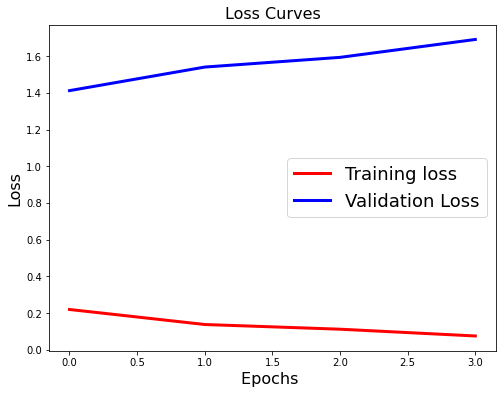

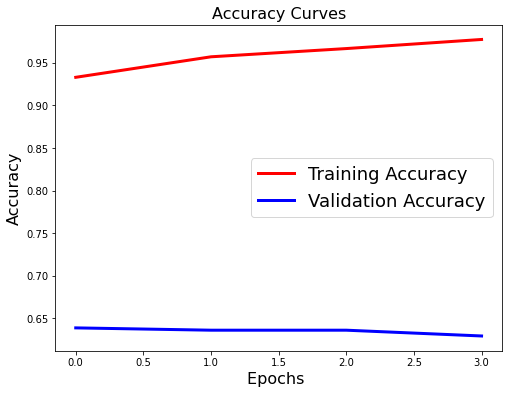

In [ ]:
plot_history(history2)

### Model 3 - Additing BatchNormalization

In [ ]:
num_classes = len(train_ds.class_names)

model = Sequential()
model.add(layers.Rescaling(1./255)) 
model.add(layers.Conv2D(32, 
                        (3,3), 
                        activation='relu',
                        input_shape=(img_width, img_height, 3), #rbg
                        padding='same'                 
                        ))
model.add(layers.Conv2D(16, (3,3), activation='relu'))
model.add(BatchNormalization()) #adding a batchnormalisation layer to tackle overfitting

model.add(layers.MaxPool2D((2,2)))
model.add(Dropout(0.5)) 

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu' ))
model.add(layers.Dense(num_classes,
                       activation='softmax' ))

model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
history3 = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10, 
    verbose=1,
    batch_size=64, 
    callbacks=[EarlyStopping(patience=3)])

Epoch 1/10
93/93 [==============================] - 23s 216ms/step - loss: 1.8383 - accuracy: 0.4929 - val_loss: 1.3177 - val_accuracy: 0.4436
Epoch 2/10
93/93 [==============================] - 21s 216ms/step - loss: 0.8574 - accuracy: 0.6453 - val_loss: 1.3151 - val_accuracy: 0.4124
Epoch 3/10
93/93 [==============================] - 21s 216ms/step - loss: 0.6124 - accuracy: 0.7683 - val_loss: 1.2524 - val_accuracy: 0.4925
Epoch 4/10
93/93 [==============================] - 21s 215ms/step - loss: 0.3785 - accuracy: 0.8655 - val_loss: 1.1666 - val_accuracy: 0.4640
Epoch 5/10
93/93 [==============================] - 22s 226ms/step - loss: 0.2239 - accuracy: 0.9301 - val_loss: 1.1288 - val_accuracy: 0.5795
Epoch 6/10
93/93 [==============================] - 22s 219ms/step - loss: 0.1767 - accuracy: 0.9458 - val_loss: 1.1206 - val_accuracy: 0.5679
Epoch 7/10
93/93 [==============================] - 21s 214ms/step - loss: 0.1212 - accuracy: 0.9638 - val_loss: 1.4054 - val_accuracy: 0.5992

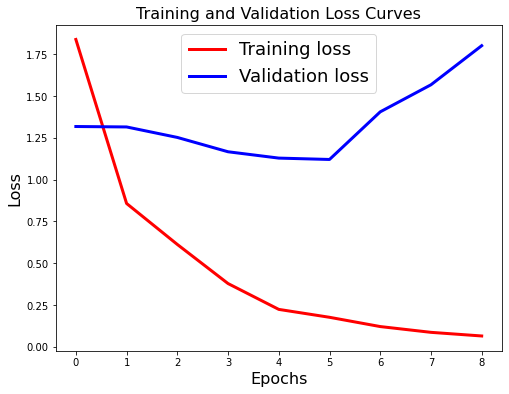

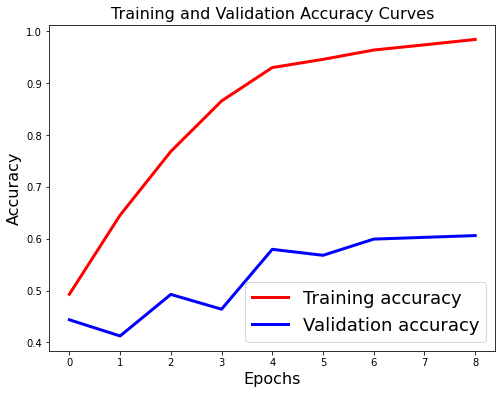

In [ ]:
plot_history(history3)

### Model 4 - Simplifying

I have done several other models for this projects (not attached). They were more complicated, with more layers. Yet, did not yield better results than Model 3 (above)

Neverthless, this model is still overfitting a lot.

Let me try to simplify it and see if it gets better.

In [ ]:
num_classes = len(train_ds.class_names)

model = Sequential()
model.add(layers.Rescaling(1./255)) 

#STEP 1: Reducting the number of neurons in the first layer to 16 (from 32)
model.add(layers.Conv2D(16, 
                        (3,3), 
                        activation='relu',
                        input_shape=(img_width, img_height, 3), 
                        padding='same'                 
                        ))
model.add(layers.Conv2D(16, (3,3), activation='relu'))
model.add(BatchNormalization()) 
model.add(layers.MaxPool2D((2,2)))
model.add(Dropout(0.5))

model.add(layers.Flatten())
#STEP 2: Reducting the number of neurons in the first dense layer to 16 (from 128)
model.add(layers.Dense(16, activation='relu' ))
model.add(layers.Dense(num_classes,
                       activation='softmax' ))

model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10, 
    verbose=1,
    batch_size=64, 
    callbacks=[EarlyStopping(patience=3)])

Epoch 1/10
93/93 [==============================] - 23s 216ms/step - loss: 1.2405 - accuracy: 0.4713 - val_loss: 1.2989 - val_accuracy: 0.3668
Epoch 2/10
93/93 [==============================] - 22s 218ms/step - loss: 0.8749 - accuracy: 0.6389 - val_loss: 1.2675 - val_accuracy: 0.3784
Epoch 3/10
93/93 [==============================] - 21s 216ms/step - loss: 0.6180 - accuracy: 0.7601 - val_loss: 1.1884 - val_accuracy: 0.4715
Epoch 4/10
93/93 [==============================] - 21s 214ms/step - loss: 0.4791 - accuracy: 0.8121 - val_loss: 1.0615 - val_accuracy: 0.5829
Epoch 5/10
93/93 [==============================] - 21s 215ms/step - loss: 0.3046 - accuracy: 0.8917 - val_loss: 0.9694 - val_accuracy: 0.6223
Epoch 6/10
93/93 [==============================] - 21s 216ms/step - loss: 0.2104 - accuracy: 0.9222 - val_loss: 1.0967 - val_accuracy: 0.5992
Epoch 7/10
93/93 [==============================] - 22s 220ms/step - loss: 0.1418 - accuracy: 0.9518 - val_loss: 1.0920 - val_accuracy: 0.6182

1. Step 1: Reducting the number of neurons in the first layer to 16 (from 32)

Epoch 8/10
93/93 [==============================] - 21s 215ms/step - loss: 0.0801 - **accuracy: 0.9796** - val_loss: 1.2215 - **val_accuracy: 0.6467**


2. Step 2: Reducting the number of neurons in the first dense layer to 16 (from 128)

Epoch 8/10
93/93 [==============================] - 22s 219ms/step - loss: 0.1389 - **accuracy: 0.9506** - val_loss: 1.2844 - **val_accuracy: 0.6399**



Ok, so overfitting did marginaly go down. Not enough though. 

Let us also add regularization into the picture.

### Regularization 

In [ ]:
num_classes = len(train_ds.class_names)

model = Sequential()
model.add(layers.Rescaling(1./255)) 

#STEP 1: Reducting the number of neurons in the first layer to 16 (from 32) - previous
model.add(layers.Conv2D(16, 
                        (3,3), 
                        activation='relu',
                        input_shape=(img_width, img_height, 3), 
                        padding='same' ,
                        kernel_regularizer=keras.regularizers.l2(0.01)        #STEP 3: Adding regulariation         
                        ))

model.add(layers.Conv2D(16, (3,3), activation='relu'))
model.add(BatchNormalization()) 
model.add(layers.MaxPool2D((2,2)))
model.add(Dropout(0.5))

model.add(layers.Flatten())
#STEP 2: Reducting the number of neurons in the first dense layer to 16 (from 128) - previous
model.add(layers.Dense(16, activation='relu' ))
model.add(layers.Dense(num_classes,
                       activation='softmax' ))

model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10, 
    verbose=1,
    batch_size=64, 
    callbacks=[EarlyStopping(patience=3)])

Epoch 1/10
93/93 [==============================] - 24s 222ms/step - loss: 1.5122 - accuracy: 0.4046 - val_loss: 1.3663 - val_accuracy: 0.3193
Epoch 2/10
93/93 [==============================] - 21s 215ms/step - loss: 1.2557 - accuracy: 0.4387 - val_loss: 1.3973 - val_accuracy: 0.3200
Epoch 3/10
93/93 [==============================] - 21s 215ms/step - loss: 1.1636 - accuracy: 0.4521 - val_loss: 1.3518 - val_accuracy: 0.3696
Epoch 4/10
93/93 [==============================] - 21s 217ms/step - loss: 1.0632 - accuracy: 0.4980 - val_loss: 1.2554 - val_accuracy: 0.3995
Epoch 5/10
93/93 [==============================] - 22s 217ms/step - loss: 0.9721 - accuracy: 0.5829 - val_loss: 1.2566 - val_accuracy: 0.5136
Epoch 6/10
93/93 [==============================] - 21s 215ms/step - loss: 0.8263 - accuracy: 0.6469 - val_loss: 1.1270 - val_accuracy: 0.4789
Epoch 7/10
93/93 [==============================] - 21s 216ms/step - loss: 0.7182 - accuracy: 0.7041 - val_loss: 1.2003 - val_accuracy: 0.5177

## Next Steps

This time, I added only: #STEP 3: Adding regulariation.
The score went down on the training set, which is good. Still large room for improvement. 

The following appraoch could be taken, now:

I could try to adjust the parameters for:
- dropout
- batchNormalization
- regularization

and see how the changes affect the results.

As the next step, I would then start adding layers to the network and improve the score on both the trainig and validation set.

Some of the other factors I could aslo adjust include:
- batch size
- kernel_size
- number of nodes in layers

Due to resource constraints, I am trying only 1-2 models with additinal layers and moving directly to a shortcut - Transfer Learning. 

## Improving the score

### Model 5

1. STEP A: Increasing the number of neurons in the first layer to 32 (back from 16). The model overfitted again, and performed worse than on less complicated network on the test set (see above)

Epoch 10/10
93/93 [==============================] - 22s 218ms/step - loss: 0.1695 - accuracy: 0.9569 - val_loss: 1.5451 - val_accuracy: 0.5924

2. STEP B: Adding another convolutional layer with 16 nodes; and decreasing the number of nodes to 16 in the input layer

In [ ]:
num_classes = len(train_ds.class_names)

model = Sequential()
model.add(layers.Rescaling(1./255)) 

#STEP A: Increasing the number of neurons in the first layer to 32
#STEP B: Decreasing back to 16

model.add(layers.Conv2D(16, 
                        (3,3), 
                        activation='relu',
                        input_shape=(img_width, img_height, 3), 
                        padding='same' ,
                        kernel_regularizer=keras.regularizers.l2(0.01)         
                        ))
model.add(layers.Conv2D(16, (3,3), activation='relu'))

#STEP B: Adding another convolutional layer with 16 nodes
model.add(layers.Conv2D(16, (3,3), activation='relu'))


model.add(BatchNormalization()) 
model.add(layers.MaxPool2D((2,2)))
model.add(Dropout(0.5))

model.add(layers.Flatten())

model.add(layers.Dense(16, activation='relu' ))
model.add(layers.Dense(num_classes,
                       activation='softmax' ))

model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds, #defined above as 20%
    epochs=10, 
    verbose=1,
    batch_size=64) #we've defined it above already, so could skip theoretically

Epoch 1/10
93/93 [==============================] - 24s 220ms/step - loss: 1.3643 - accuracy: 0.3856 - val_loss: 1.3710 - val_accuracy: 0.3438
Epoch 2/10
93/93 [==============================] - 22s 223ms/step - loss: 1.0450 - accuracy: 0.5674 - val_loss: 1.4077 - val_accuracy: 0.3499
Epoch 3/10
93/93 [==============================] - 22s 220ms/step - loss: 0.8848 - accuracy: 0.6367 - val_loss: 1.4289 - val_accuracy: 0.3967
Epoch 4/10
93/93 [==============================] - 22s 219ms/step - loss: 0.7503 - accuracy: 0.6952 - val_loss: 1.1473 - val_accuracy: 0.5231
Epoch 5/10
93/93 [==============================] - 22s 220ms/step - loss: 0.6294 - accuracy: 0.7486 - val_loss: 1.0893 - val_accuracy: 0.5516
Epoch 6/10
93/93 [==============================] - 22s 222ms/step - loss: 0.4939 - accuracy: 0.8042 - val_loss: 1.1291 - val_accuracy: 0.5876
Epoch 7/10
93/93 [==============================] - 22s 221ms/step - loss: 0.4499 - accuracy: 0.8340 - val_loss: 1.8866 - val_accuracy: 0.5577

I run the above twice.

Models accuracy of picking the right pitures is slightly higher than picking by chance (~60% vs 25%).

There is still quite a lot of room for improvement.

## Final Model - Transfer Learning


Let us try a pre-trained model provided by keras.

The advantage is that the network is supposed to be quite good. 
The disadvantage is that it is quite complicated 

Attempt 1: 
test_accuracy: 0.9280 - val_accuracy: 0.8370
Huge improvement. Still some overfitting


Attempt 2: Adding a dropout layer (0.5)
test_accuracy: 0.8112 - val_accuracy: 0.7921
The overfitting is smaller, the results are also smaller.

Attemp 3: Final model - decreasing dropout to 0.3

In [42]:
from tensorflow.keras.applications import EfficientNetB0

In [43]:
efficient_model = EfficientNetB0(weights='imagenet', #take the weights
                                 include_top=False, #not uploading the last layer, to customise it
                                 input_shape=(img_width, img_height, 3))

16705208/16705208 [==============================] - 2s 0us/step


In [ ]:
num_classes = len(train_ds.class_names)

model = Sequential()
model.add(efficient_model) #convolution, maxpooling layers, etc. from the model

model.add(Flatten())

#adding dense layers
model.add(Dense(16, activation='relu', kernel_initializer='he_uniform'))

#Attempt 2: adding the dropout layer
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10,
  verbose=1,
  batch_size = 64
)

Epoch 1/10
93/93 [==============================] - 33s 250ms/step - loss: 0.3323 - accuracy: 0.8925 - val_loss: 2.0398 - val_accuracy: 0.7629
Epoch 2/10
93/93 [==============================] - 22s 221ms/step - loss: 0.3537 - accuracy: 0.8869 - val_loss: 1.3875 - val_accuracy: 0.8077
Epoch 3/10
93/93 [==============================] - 22s 225ms/step - loss: 0.4062 - accuracy: 0.8564 - val_loss: 0.9420 - val_accuracy: 0.7894
Epoch 4/10
93/93 [==============================] - 22s 221ms/step - loss: 0.2464 - accuracy: 0.9153 - val_loss: 1.2503 - val_accuracy: 0.8145
Epoch 5/10
93/93 [==============================] - 22s 225ms/step - loss: 0.4257 - accuracy: 0.8552 - val_loss: 0.9026 - val_accuracy: 0.7955
Epoch 6/10
93/93 [==============================] - 22s 221ms/step - loss: 0.4053 - accuracy: 0.8662 - val_loss: 0.9948 - val_accuracy: 0.7874
Epoch 7/10
93/93 [==============================] - 22s 223ms/step - loss: 0.2617 - accuracy: 0.9065 - val_loss: 1.0334 - val_accuracy: 0.8268

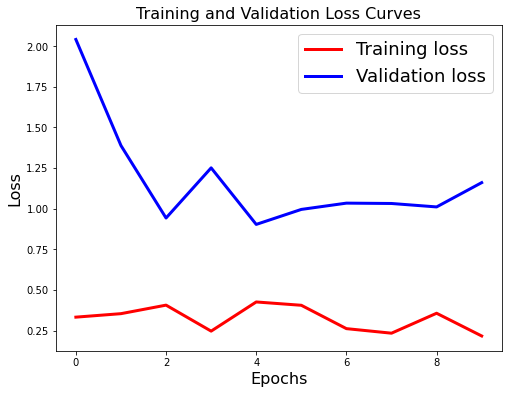

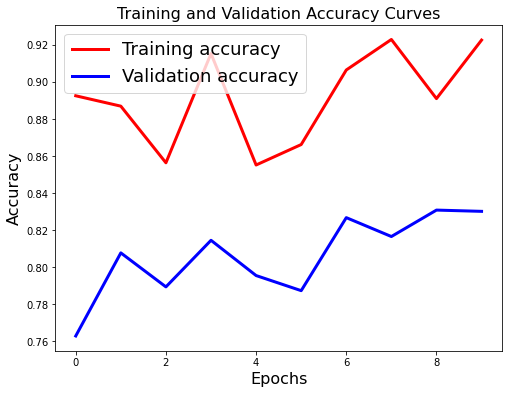

In [ ]:
plot_history(history)
#Run twice as the result was still improving after the first try

Let us have this as a final model

In [ ]:
# !pip install tensorflow==2.9.1

In [ ]:
!pip show tensorflow

Name: tensorflow
Version: 2.9.1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.8/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, keras-preprocessing, libclang, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: kapre


In [ ]:
#The 2.11.0 tensorflow version does return an error. Will try with 2.9.1 as per some forums
model.save('/content/drive/MyDrive/Images_webscrapping/img_project/Startrek_classification/model')

# Evaluation

In [14]:
#Importing the model
model = keras.models.load_model('/content/drive/MyDrive/Images_webscrapping/img_project/Startrek_classification/model')

In [15]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 4, 4, 1280)       4049571   
                                                                 
 flatten_2 (Flatten)         (None, 20480)             0         
                                                                 
 dense_3 (Dense)             (None, 16)                327696    
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_4 (Dense)             (None, 4)                 68        
                                                                 
Total params: 4,377,335
Trainable params: 4,335,312
Non-trainable params: 42,023
_________________________________________________________________


In [16]:
data_dir = '/content/drive/MyDrive/Images_webscrapping/img_project/Startrek_classification/test/'

test_ds = keras.utils.image_dataset_from_directory(
  data_dir,
  image_size=(img_height, img_width),
  label_mode='categorical',
  shuffle=False) #z defaulta na True, przy kazdym batchu zmienia kolejnosc
  #treningowy false

Found 1838 files belonging to 4 classes.


In [17]:
y_pred = model.predict(test_ds).argmax(axis=1)

58/58 [==============================] - 516s 9s/step


In [18]:
y_test = [np.argmax(label, axis=1) for img, label in test_ds]
y_test = np.concatenate(y_test)

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       610
           1       0.98      0.81      0.88       237
           2       0.81      0.93      0.87       622
           3       0.88      0.56      0.68       369

    accuracy                           0.83      1838
   macro avg       0.86      0.80      0.82      1838
weighted avg       0.84      0.83      0.82      1838



The results are surprisingly good. Except for the last category - Voyager.
Since pictures from IMDB is a mixture of backstage and onstage pics, I thought that maybe somehow they go seperated in training / testing sets (but nope).

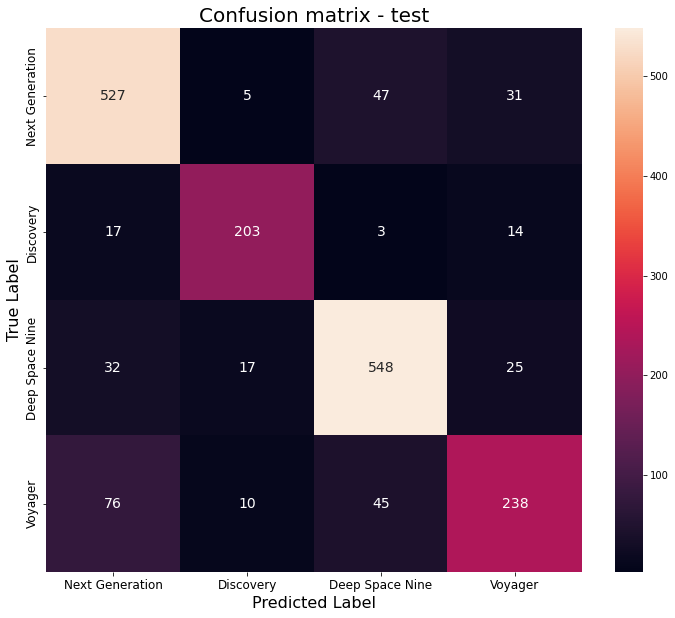

In [ ]:
fig, ax= plt.subplots(figsize=(12,10))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', annot_kws={"size": 14})

plt.xlabel('Predicted Label', fontsize=16)
plt.ylabel('True Label', fontsize=16)
plt.title('Confusion matrix - test', fontsize=20)
ax.xaxis.set_ticklabels(['Next Generation', 'Discovery', 'Deep Space Nine', 'Voyager'], fontsize=12)
ax.yaxis.set_ticklabels(['Next Generation', 'Discovery', 'Deep Space Nine', 'Voyager'],fontsize=12)

plt.show()

In general, I'm rather satisfied. It feels that the worst performing category is Voyager. The reasons could be:
- smaller data 1.4k pics in total, compared to ~2.5 for Deep Space Nine and Next Gen. Discovery has even less pics, less than 1k, but the pictures are much most distinguishable: different resultion, more modern, better computer graphics.
- Looking closer at the pictures from Voyager, there are many random / one-off characters introducted. The hypothesis is that if there is a random / one-off character, it would be put into New Generation as they also have many random characters and it is also the largest category. 

Other random characters look similiar to jem hadar, or are bajoran/cardasian and could be mistaken for deep spece nine - special races that are mosly in this series.

Balancing the data could definately solve the problem.

In [20]:
#Checking how many pictures I do have for the movies
titles=['start_trek_next_generation', 
        'start_trek_discovery',
        'start_trek_deep_space_nine',
        'start_trek_voyager']

for title in titles:
  path=f'/content/drive/MyDrive/Images_webscrapping/img_project/Startrek_classification/test/{title}'
  print(f'{path}/:{len(os.listdir(path))}')

/content/drive/MyDrive/Images_webscrapping/img_project/Startrek_classification/test/start_trek_next_generation/:622
/content/drive/MyDrive/Images_webscrapping/img_project/Startrek_classification/test/start_trek_discovery/:237
/content/drive/MyDrive/Images_webscrapping/img_project/Startrek_classification/test/start_trek_deep_space_nine/:610
/content/drive/MyDrive/Images_webscrapping/img_project/Startrek_classification/test/start_trek_voyager/:370


## Try a random picture

Finally, the momement I have been waiting for:)

I've taken random pictures from the screen and also screenshots from the mobile (not very controlled, but can live with it:)). 

Will now upload the pics and ask the model to predict where they come from.

In [21]:
from google.colab.patches import cv2_imshow
import cv2

In [34]:
img_dir = '/content/drive/MyDrive/Images_webscrapping/img_project/Startrek_classification/pics_to_predict/'
correct_movies=['DS9', 'NextGen', 'NextGen', 'DS9', 'DS9', 'Discovery', 'Discovery', 'Discovery', 'Voyager', 'Voyager', 'Voyager','Voyager', 'NextGen', 'NextGen', 'NextGen',
                'DS9','DS9','DS9','DS9','DS9']

print(len(os.listdir(img_dir)))
len(correct_movies)

20


20

1/1 [==============================] - 0s 49ms/step
Picture number:0


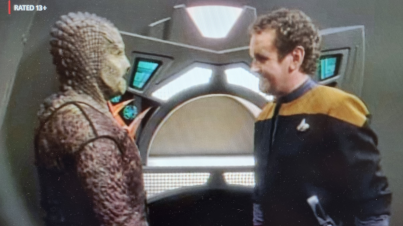

start_trek_voyager
DS9

----

1/1 [==============================] - 0s 29ms/step
Picture number:1


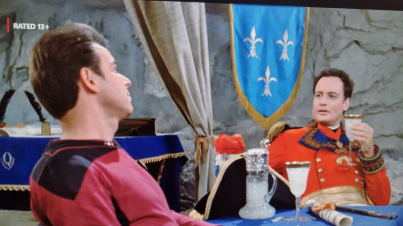

start_trek_deep_space_nine
NextGen

----

1/1 [==============================] - 0s 32ms/step
Picture number:2


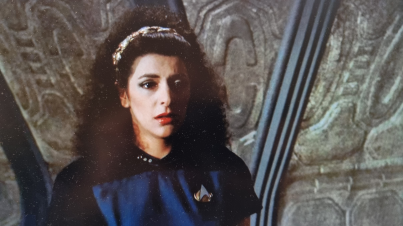

start_trek_voyager
NextGen

----

1/1 [==============================] - 0s 33ms/step
Picture number:3


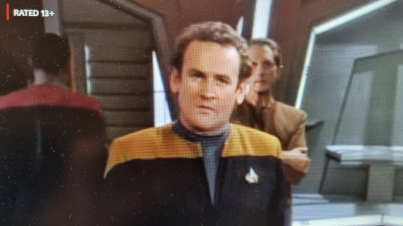

start_trek_voyager
DS9

----

1/1 [==============================] - 0s 30ms/step
Picture number:4


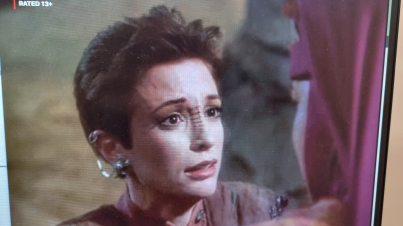

start_trek_deep_space_nine
DS9

----

1/1 [==============================] - 0s 38ms/step
Picture number:5


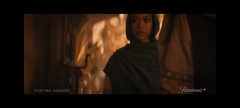

start_trek_voyager
Discovery

----

1/1 [==============================] - 0s 32ms/step
Picture number:6


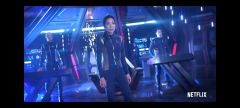

start_trek_deep_space_nine
Discovery

----

1/1 [==============================] - 0s 32ms/step
Picture number:7


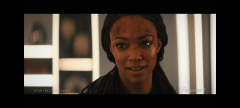

start_trek_discovery
Discovery

----

1/1 [==============================] - 0s 30ms/step
Picture number:8


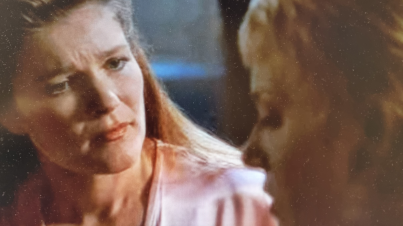

start_trek_discovery
Voyager

----

1/1 [==============================] - 0s 37ms/step
Picture number:9


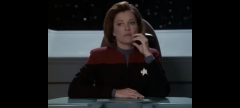

start_trek_voyager
Voyager

----

1/1 [==============================] - 0s 30ms/step
Picture number:10


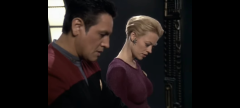

start_trek_voyager
Voyager

----

1/1 [==============================] - 0s 32ms/step
Picture number:11


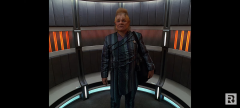

start_trek_voyager
Voyager

----

1/1 [==============================] - 0s 29ms/step
Picture number:12


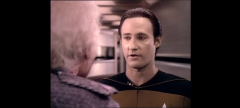

start_trek_next_generation
NextGen

----

1/1 [==============================] - 0s 29ms/step
Picture number:13


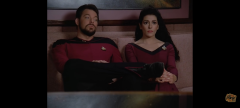

start_trek_next_generation
NextGen

----

1/1 [==============================] - 0s 30ms/step
Picture number:14


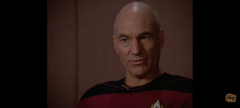

start_trek_next_generation
NextGen

----

1/1 [==============================] - 0s 30ms/step
Picture number:15


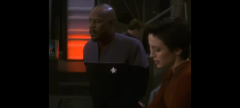

start_trek_voyager
DS9

----

1/1 [==============================] - 0s 30ms/step
Picture number:16


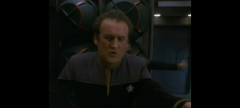

start_trek_voyager
DS9

----

1/1 [==============================] - 0s 31ms/step
Picture number:17


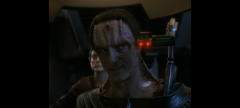

start_trek_voyager
DS9

----

1/1 [==============================] - 0s 29ms/step
Picture number:18


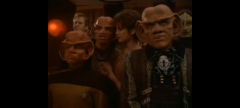

start_trek_voyager
DS9

----

1/1 [==============================] - 0s 29ms/step
Picture number:19


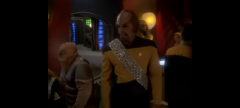

start_trek_voyager
DS9

----



In [38]:
for pic_num in range(len(os.listdir(img_dir))):

  img = cv2.imread(img_dir + '/' + os.listdir(img_dir)[pic_num])

  resized = cv2.resize(img, (128,128), interpolation=cv2.INTER_AREA)

  pred = model.predict(np.array([resized])).argmax(axis=1)
  test_ds.class_names[pred[0]]

  #resizing the imgage
  ratio = 0.1
  width_ts = int(img.shape[1] * ratio)
  height_ts = int(img.shape[0] * ratio)
  dim_ts = (width_ts, height_ts)

  resized_to_show = cv2.resize(img, dim_ts, interpolation=cv2.INTER_AREA)

  print(f'Picture number:{pic_num}')
  cv2_imshow(resized_to_show)
  print(test_ds.class_names[pred[0]])
  print(correct_movies[pic_num])
  print('\n----\n')

So, out of 10 pictures, the model managed to identify 8 correctly.
A bit dissappointing that it failed to recognize the main characters from DS9:(

What I have noticed it that the better the resolution of the pictrute, the higher chance of correct classification. 

Another factor - noice. The smaller the noise, the easier to recognise.

- Picture number 8 and 9. Janeway with relatively plain background - correcly recognised as Voyager, Janeway with bad resolution and another person - wrong classification.

On the contrary to my prediction, the model like to recognize pictures as Voyager. Well, I would expect Next Generation, since it is the most frequent category. 

# Next Steps

### Model

In addition to paremeter adjustment described before:
*   The model should be re-run on a balanced data. The the data could be balanced manually
*   It would be interesting to see if the model performs better on other movies, that are more distinguishable. For instance Shrek and Star Trek.
*   As noted before, in the current data there are pictures of the same actors in different categories. And sometimes, it would be hard to see what movies they come from for a Star Trek fan. 
*   It would be in particular interesting to look at the training data, and understand why pictures belonging to deep space nice were classified as voyager
In other words, it could be good to clean-up the training data, in other words.

### Project 

*   To polish the project and enable for scalibility, it could be good to summarise the model to one function. When one provides only the movies titles (id) and the model is built automatically

*   A real-life application of the following could be an app with one scans a movie and the app tells what movies it comes form. Well, we already have a Google lense, though:)

# Augmentation

As a bonus I have also done augmentation to decrease overfitting of the final model.

My expection is that the overfitting will decrease, but also the accuracy on the training model will significantly go down. Let's see:) 

In [39]:
data_augmentation = keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"), #random flip horizonatlly and verically
  layers.RandomRotation(0.2), #random roation by 20 degrees
  layers.RandomZoom((0.2, 0.3)) #random zoom by 20% to 30%
])

In [44]:
num_classes = len(train_ds.class_names)

model = Sequential()
model.add(efficient_model) #convolution, maxpooling layers, etc. from the model

model.add(Flatten())

#adding dense layers
model.add(Dense(16, activation='relu', kernel_initializer='he_uniform'))

#Attempt 2: adding the dropout layer
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

opt = tensorflow.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, 
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10, 
    verbose=1,
    batch_size=64, 
    callbacks=[EarlyStopping(patience=3)])

Epoch 1/10
15/93 [===>..........................] - ETA: 5:06 - loss: 1.4172 - accuracy: 0.3240

In [ ]:
plot_history(history)

EfficientNetB0 works surprisingly well with augementation as well. The model is overfitted for sure, but the results are relatively good.